In [1]:
import pandas as pd # rating prediction? after? // sentiment analysis (choose one: pos & neg comments)

In [2]:
df = pd.read_csv('../Data/Google-Playstore.csv')

In [3]:
df.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,...,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,...,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,...,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,...,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,...,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [4]:
len(df)

1118136

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   App Name           1118135 non-null  object 
 1   App Id             1118136 non-null  object 
 2   Category           1118133 non-null  object 
 3   Rating             1111286 non-null  float64
 4   Rating Count       1111286 non-null  float64
 5   Installs           1117975 non-null  object 
 6   Minimum Installs   1117975 non-null  float64
 7   Maximum Installs   1118136 non-null  int64  
 8   Free               1118136 non-null  bool   
 9   Price              1118136 non-null  float64
 10  Currency           1117975 non-null  object 
 11  Size               1118136 non-null  object 
 12  Minimum Android    1116123 non-null  object 
 13  Developer Id       1118134 non-null  object 
 14  Developer Website  703770 non-null   object 
 15  Developer Email    1118114 non-n

In [6]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice'],
      dtype='object')

In [7]:
df['Maximum Installs'].unique()

array([  351560,  2161778, 79304739, ...,  1213676,    46712,   149962])

<AxesSubplot:>

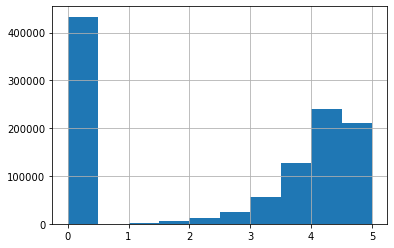

In [8]:
df['Rating'].hist() # unbalanced ds  (drop all 0s and work with the rest)

In [9]:
df[df['Rating']== 0].count()

App Name             433265
App Id               433265
Category             433265
Rating               433265
Rating Count         433265
Installs             433265
Minimum Installs     433265
Maximum Installs     433265
Free                 433265
Price                433265
Currency             433265
Size                 433265
Minimum Android      432054
Developer Id         433265
Developer Website    245076
Developer Email      433259
Released             433203
Last Updated         433265
Content Rating       433265
Privacy Policy       368015
Ad Supported         433265
In App Purchases     433265
Editors Choice       433265
dtype: int64

In [10]:
df['Minimum Installs'].unique()

array([1.e+05, 1.e+06, 5.e+07, 1.e+08, 5.e+04, 1.e+04, 1.e+07, 5.e+06,
       5.e+08, 5.e+02, 5.e+05, 1.e+03, 1.e+02, 5.e+09, 5.e+03, 1.e+01,
       5.e+01, 1.e+00,    nan, 5.e+00, 1.e+09, 0.e+00, 1.e+10])

In [11]:
df['Minimum Android'].value_counts() # min version required

4.1 and up      344239
4.4 and up      165618
5.0 and up      138141
4.0.3 and up    117939
4.0 and up       89365
                 ...  
2.1 - 4.2.2          1
1.6 - 2.3.4          1
2.3 - 7.0            1
2.2 - 4.4W           1
2.2 - 6.0            1
Name: Minimum Android, Length: 139, dtype: int64